In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('titanic.csv',sep=';')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Cabin'].fillna('G6',inplace=True)
data['Embarked'].fillna('S',inplace=True)
#Converting Sex to numerical 
cleanup_nums={ "Sex" : {"female":0,"male":1}}
data.replace(cleanup_nums,inplace=True)

In [5]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [7]:
x=data.drop(['PassengerId','Survived','Name','Ticket','Cabin','Embarked'],axis=1)
y=data['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=10)

#applying tree algorithm
model = tree.DecisionTreeClassifier(random_state=10)  
model.fit(x_train, y_train)   #fitting our model
y_pred=model.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8044692737430168


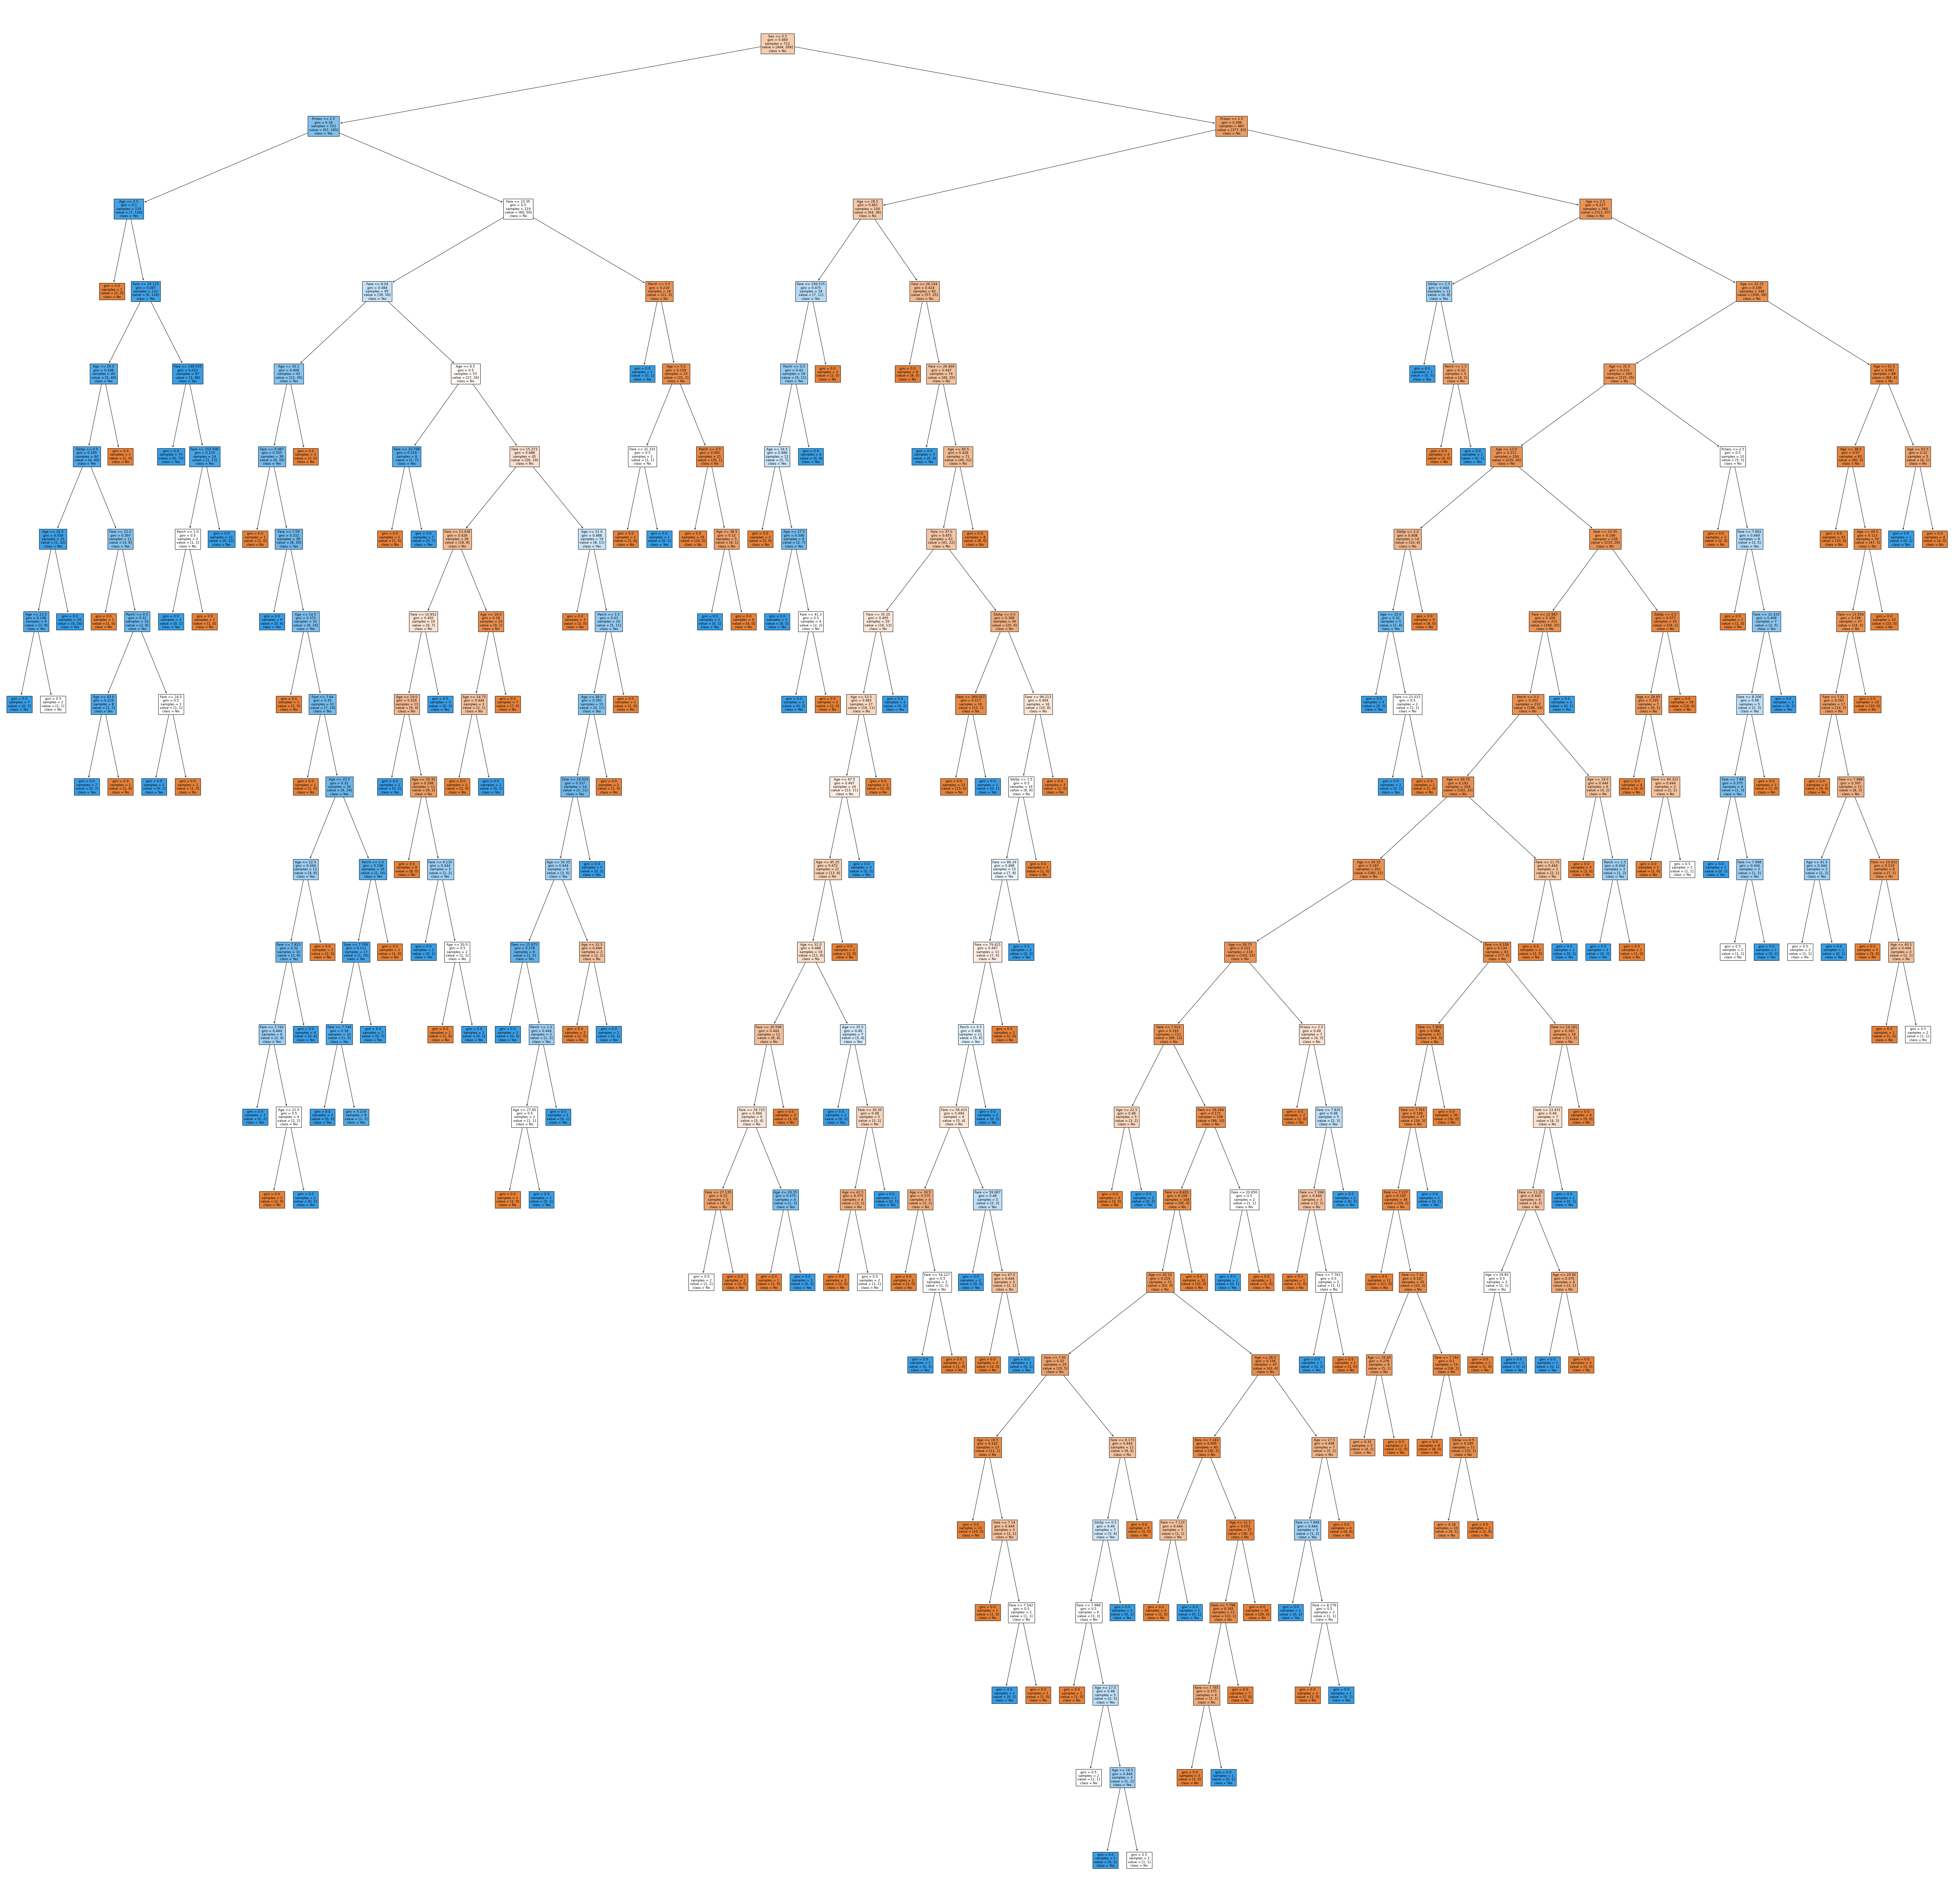

In [8]:
fig = plt.figure(figsize=(100,100))
tree.plot_tree(model, 
                   feature_names=x.columns.values.tolist(),  
                   class_names=data.Survived.unique(),
                   filled=True)
fig.savefig("tree.png")

In [9]:
model1 = tree.DecisionTreeClassifier(max_depth=5,random_state=10)  
model1.fit(x_train, y_train)   #fitting our model
y_pred=model1.predict(x_test)   # evaluating our model

print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8100558659217877


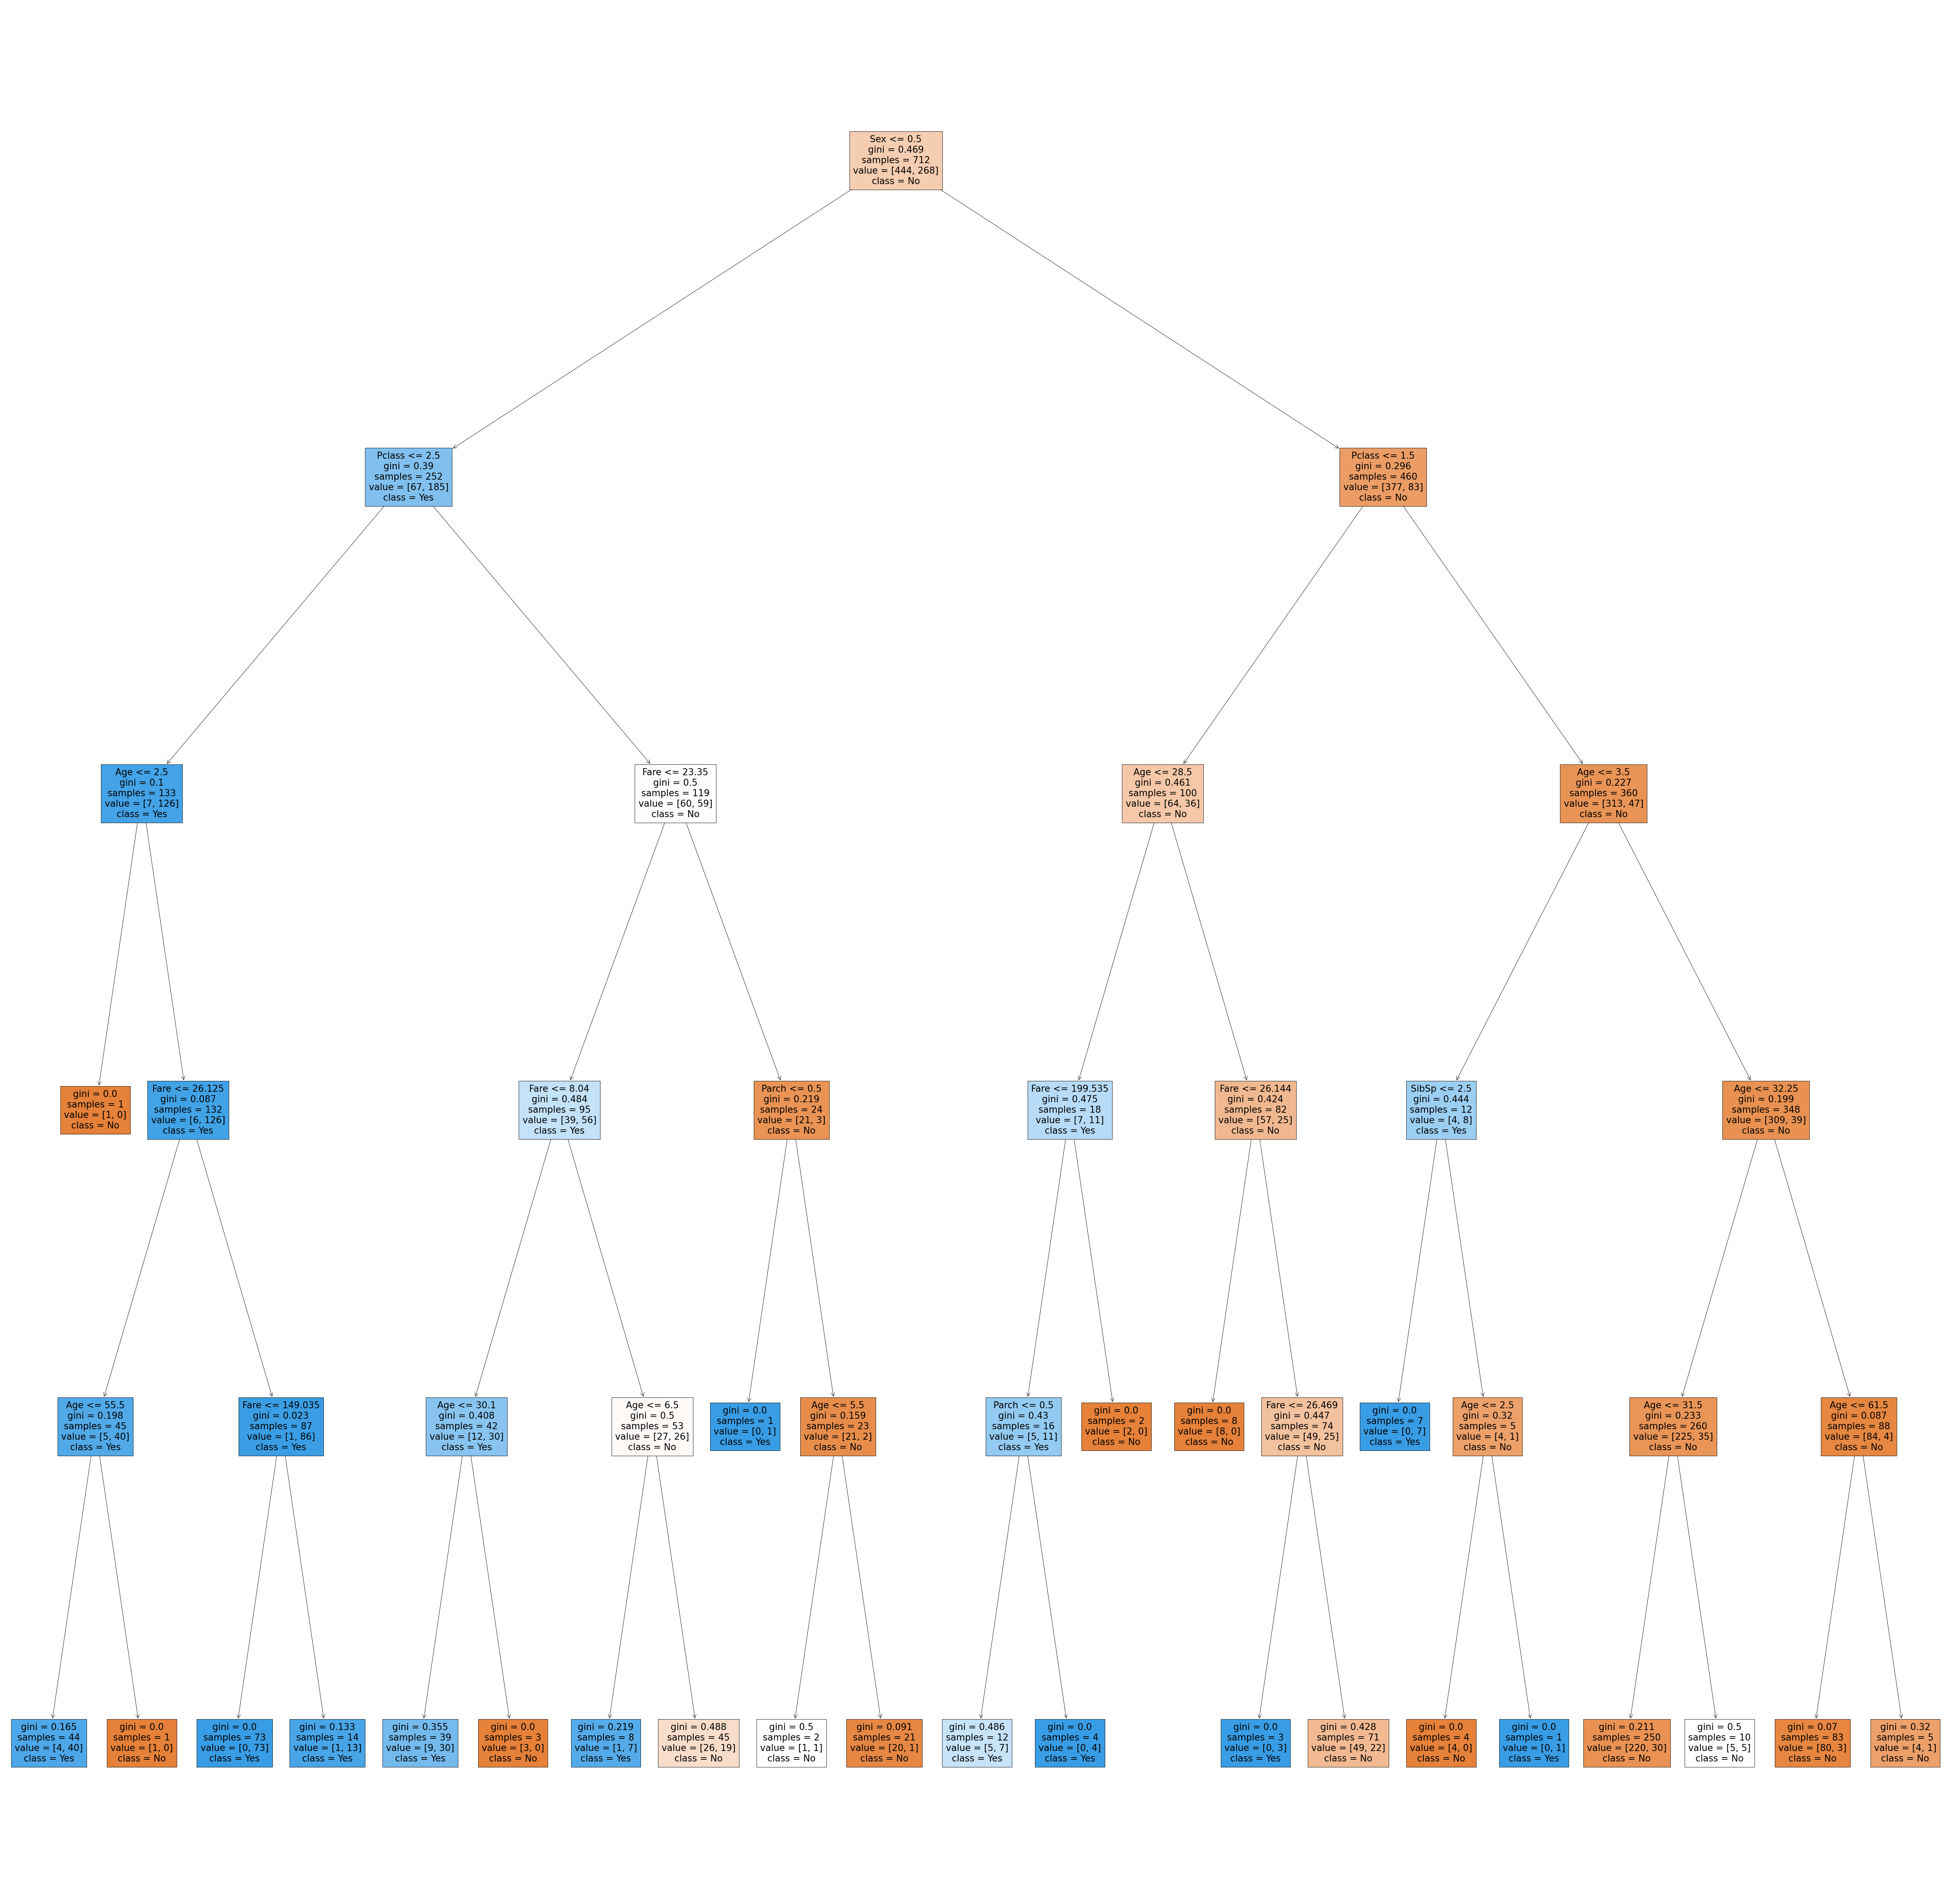

In [10]:
fig = plt.figure(figsize=(100,100))
tree.plot_tree(model1,
                   feature_names=x.columns.values.tolist(),  
                   class_names=data.Survived.unique(),
                   filled=True)
fig.savefig("tree1.png")